In [27]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Specify the path 
heat_wave_path = r"C:\Users\wanh535\OneDrive - PNNL\Desktop\IM3\Heat Waves\Climate_data\historic\heat_wave_library\With_spatial_coverage\\"
cold_snap_path = r"C:\Users\wanh535\OneDrive - PNNL\Desktop\IM3\Heat Waves\Climate_data\historic\cold_snap_library\With_spatial_coverage\\"

In [31]:
# List all files in the directory
filenames_hw_area = [file for file in os.listdir(heat_wave_path) if 'average_area' in file and file.endswith('.csv')]
filenames_hw_pop = [file for file in os.listdir(heat_wave_path) if 'average_pop' in file and file.endswith('.csv')]

filenames_cs_area = [file for file in os.listdir(cold_snap_path) if 'average_area' in file and file.endswith('.csv')]
filenames_cs_pop = [file for file in os.listdir(cold_snap_path) if 'average_pop' in file and file.endswith('.csv')]

In [33]:
# Sort the filenames
filenames_hw_area = sorted(filenames_hw_area, key=lambda name: int(re.search(r'\d+', name).group()))
filenames_hw_pop = sorted(filenames_hw_pop, key=lambda name: int(re.search(r'\d+', name).group()))

filenames_cs_area = sorted(filenames_cs_area, key=lambda name: int(re.search(r'\d+', name).group()))
filenames_cs_pop = sorted(filenames_cs_pop, key=lambda name: int(re.search(r'\d+', name).group()))

In [35]:
# Reading each CSV file into a DataFrame and assigning a definition label
dfs_hw_area = []
for i, filename in enumerate(filenames_hw_area, start = 1):
    full_path = os.path.join(heat_wave_path, filename)
    df = pd.read_csv(full_path)
    df['definition'] = f'Definition {i}'
    dfs_hw_area.append(df)
    
dfs_hw_pop = []
for i, filename in enumerate(filenames_hw_pop, start = 1):
    full_path = os.path.join(heat_wave_path, filename)
    df = pd.read_csv(full_path)
    df['definition'] = f'Definition {i}'
    dfs_hw_pop.append(df)

dfs_cs_area = []
for i, filename in enumerate(filenames_cs_area, start = 1):
    full_path = os.path.join(cold_snap_path, filename)
    df = pd.read_csv(full_path)
    df['definition'] = f'Definition {i}'
    dfs_cs_area.append(df)
    
dfs_cs_pop = []
for i, filename in enumerate(filenames_cs_pop, start = 1):
    full_path = os.path.join(cold_snap_path, filename)
    df = pd.read_csv(full_path)
    df['definition'] = f'Definition {i}'
    dfs_cs_pop.append(df)

# Convert to a data frame
all_hw_area = pd.concat(dfs_hw_area, ignore_index = True)
all_hw_pop = pd.concat(dfs_hw_pop, ignore_index = True)

all_cs_area = pd.concat(dfs_cs_area, ignore_index = True)
all_cs_pop = pd.concat(dfs_cs_pop, ignore_index = True)

In [36]:
# Convert 'centroid_date' to datetime
all_hw_area['centroid_date'] = pd.to_datetime(all_hw_area['centroid_date'])
all_hw_pop['centroid_date'] = pd.to_datetime(all_hw_pop['centroid_date'])

all_cs_area['centroid_date'] = pd.to_datetime(all_cs_area['centroid_date'])
all_cs_pop['centroid_date'] = pd.to_datetime(all_cs_pop['centroid_date'])

In [37]:
# Convert K to degree C
all_hw_area['highest_temperature'] = all_hw_area['highest_temperature'] - 273.15
all_hw_pop['highest_temperature'] = all_hw_pop['highest_temperature'] - 273.15

all_cs_area['lowest_temperature'] = all_cs_area['lowest_temperature'] - 273.15
all_cs_pop['lowest_temperature'] = all_cs_pop['lowest_temperature'] - 273.15

# Plot for event intensity (highest/lowest temperature)

In [42]:
# Group by the definition and NERC subregions, then calculate the mean of extreme_temperature
grouped_hw_area = all_hw_area.groupby(['definition', all_hw_area['NERC_ID']])['highest_temperature'].mean().unstack(0)
grouped_hw_pop = all_hw_pop.groupby(['definition', all_hw_pop['NERC_ID']])['highest_temperature'].mean().unstack(0)

grouped_cs_area = all_cs_area.groupby(['definition', all_cs_area['NERC_ID']])['lowest_temperature'].mean().unstack(0)
grouped_cs_pop = all_cs_pop.groupby(['definition', all_cs_pop['NERC_ID']])['lowest_temperature'].mean().unstack(0)


In [44]:
# Sort columns and rows
grouped_hw_area = grouped_hw_area.reindex(sorted(grouped_hw_area.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_area = grouped_hw_area.reindex(sorted(grouped_hw_area.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_hw_pop = grouped_hw_pop.reindex(sorted(grouped_hw_pop.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_pop = grouped_hw_pop.reindex(sorted(grouped_hw_pop.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_area = grouped_cs_area.reindex(sorted(grouped_cs_area.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_area = grouped_cs_area.reindex(sorted(grouped_cs_area.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_cs_pop = grouped_cs_pop.reindex(sorted(grouped_cs_pop.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_pop = grouped_cs_pop.reindex(sorted(grouped_cs_pop.index, key=lambda x: int(re.search(r'\d+', x).group())))


In [46]:
grouped_hw_area

definition,Definition 1,Definition 2,Definition 3,Definition 4,Definition 5,Definition 6,Definition 7,Definition 8,Definition 9,Definition 10,Definition 11,Definition 12
NERC_ID,,,,,,,,,,,,
NERC1,34.250789,35.241095,35.954565,36.482494,35.372398,36.284802,35.068701,27.691959,33.897700,35.986576,35.079723,27.504494
NERC2,32.545940,33.701058,34.854947,35.816268,33.734250,35.145993,33.346438,27.478057,32.480873,34.943868,33.291663,26.779626
NERC3,37.910746,38.813038,39.656037,40.347103,38.816542,40.060471,38.542430,33.452597,37.268176,38.742682,38.141500,31.938290
NERC4,34.009796,34.568390,35.156119,35.684498,34.690799,35.488148,34.400493,31.774360,33.076819,34.188912,33.867644,30.623217
NERC5,27.944667,28.886357,29.940279,30.467878,28.858057,30.194132,28.782391,22.446004,27.524313,29.767386,28.641907,21.026206
NERC6,29.693771,30.643280,31.505675,32.046486,30.609138,31.842270,30.673854,19.874243,29.682186,31.706745,30.658181,19.007335
NERC7,30.142953,30.982029,31.724111,32.211077,31.016174,32.335377,30.821730,21.525485,30.086188,31.693426,30.979714,21.085430
NERC8,37.412768,38.420957,39.511206,40.266406,38.600340,39.874750,38.169488,30.253454,37.017904,39.337102,37.843392,28.607848
NERC9,36.006658,36.999358,37.949542,38.581136,37.042541,38.466682,36.462677,30.875275,35.276753,37.260740,35.872394,30.002192


In [48]:
# Define the custom colors and line styles based on the updated logic
custom_colors = [
    '#a3e4a7',  # Def 1: very light green for >90th
    '#32cd32',  # Def 2: light green for >95th
    '#228b22',  # Def 3: darker green for >98th
    '#006400',  # Def 4: darkest green for >99th
    '#ff1a1a',  # Def 5: dark red for > 95th
    '#800000',  # Def 6: darkest red for >97.5th + >81th
    '#ff9999',  # Def 7: light red for >90th + >75th
    '#ffcccc',  # Def 8: lightest red for >90th
    '#4682b4',  # Def 9: medium blue for >95th
    '#00008b',  # Def 10: darkest blue for >97.5th + >81th
    '#87cefa',  # Def 11: lighter blue for >90th + >75th
    '#b3d9ff',  # Def 12: lightes blue for > 90th
]

# Define the line styles based on the thresholds logic
linestyles = [
    '-',   # Def 1-4: Solid line for single threshold
    '-', 
    '-', 
    '-', 
    '-',   # Def 5: Solid line for single threshold
    '--',  # Def 6: Dashed line for two thresholds
    '--',  # Def 7: Dashed line for two thresholds
    'dotted',  # Def 8: Dotted line for moving window
    '-',   # Def 9: Solid line for single threshold 
    '--',  # Def 10: Dashed line for two thresholds 
    '--',  # Def 11: Dashed line for two thresholds 
    'dotted',  # Def 12: Dotted line for moving window 
]



In [50]:
# # Generate 12 colors using Turbo colormap
# turbo_colors = [plt.cm.turbo(i / 11) for i in range(12)]
# # Assign these Turbo colors to the thresholds
# custom_colors = [
#     turbo_colors[0],  # Def 1: Turbo color for >90th
#     turbo_colors[1],  # Def 2: Turbo color for >95th
#     turbo_colors[2],  # Def 3: Turbo color for >98th
#     turbo_colors[3],  # Def 4: Turbo color for >99th
#     turbo_colors[4],  # Def 5: Turbo color for >95th
#     turbo_colors[5],  # Def 6: Turbo color for >97.5th + >81th
#     turbo_colors[6],  # Def 7: Turbo color for >90th + >75th
#     turbo_colors[7],  # Def 8: Turbo color for >90th
#     turbo_colors[8],  # Def 9: Turbo color for >95th
#     turbo_colors[9],  # Def 10: Turbo color for >97.5th + >81th
#     turbo_colors[10], # Def 11: Turbo color for >90th + >75th
#     turbo_colors[11], # Def 12: Turbo color for >90th
# ]

# # Define the line styles based on the thresholds logic
# linestyles = [
#     '-',   # Def 1-4: Solid line for single threshold
#     '-',
#     '-',
#     '-',
#     '-',   # Def 5: Solid line for single threshold
#     '--',  # Def 6: Dashed line for two thresholds
#     '--',  # Def 7: Dashed line for two thresholds
#     'dotted',  # Def 8: Dotted line for moving window
#     '-',   # Def 9: Solid line for single threshold
#     '--',  # Def 10: Dashed line for two thresholds
#     '--',  # Def 11: Dashed line for two thresholds
#     'dotted',  # Def 12: Dotted line for moving window
# ]

C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\901831199.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\901831199.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\901831199.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\901831199.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

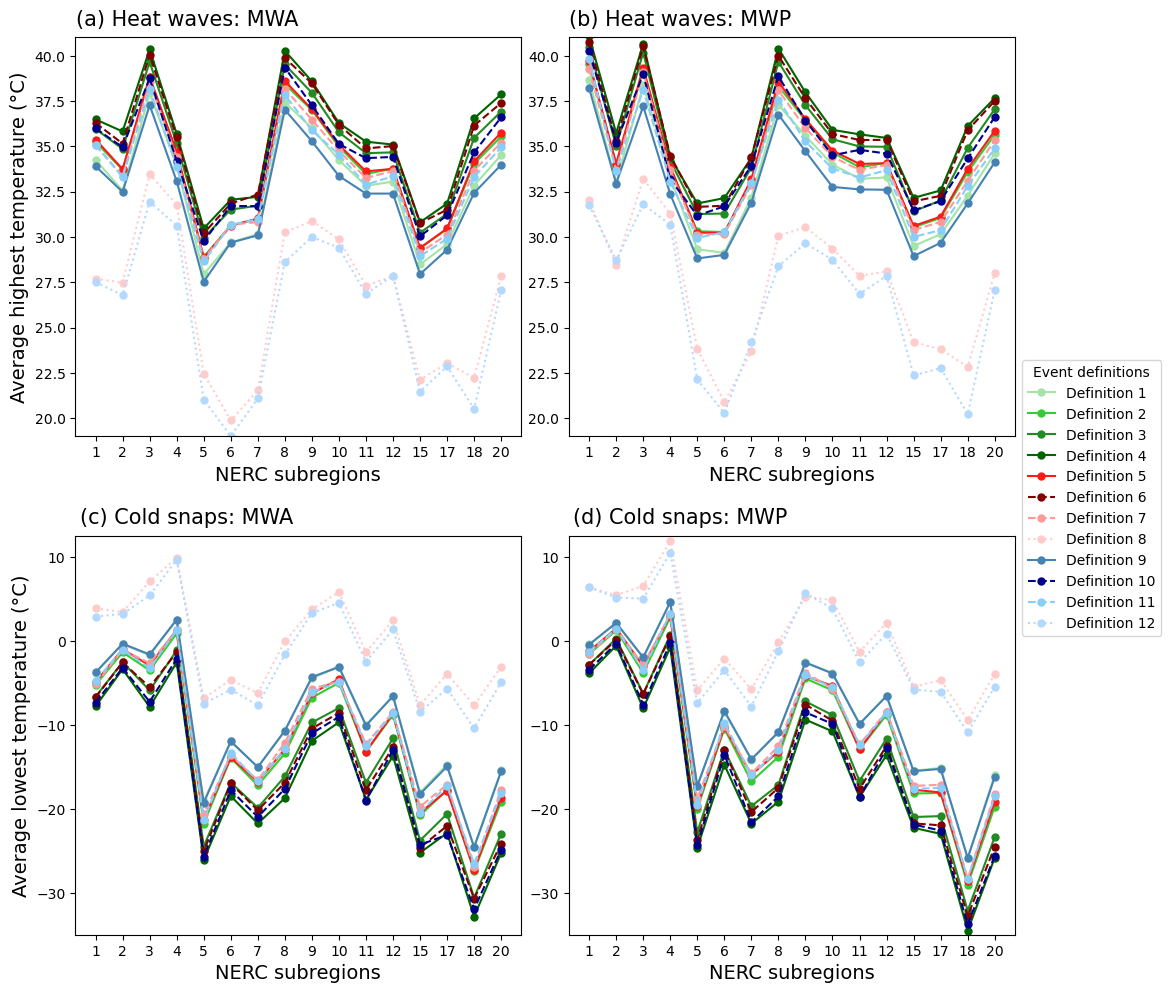

In [54]:
## Plot the extreme temperatures for each NERC subregion under different definitions

# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create the plots using the updated color, line styles, and smaller marker size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_area for heat waves
for idx, column in enumerate(grouped_hw_area.columns):
    axes[0, 0].plot(grouped_hw_area.index, grouped_hw_area[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 0].set_ylabel('Average highest temperature (°C)', fontsize=14)
axes[0, 0].set_ylim([19, 41])
axes[0, 0].set_xlabel('NERC subregions', fontsize=14)
axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area.index])
axes[0, 0].text(0.25, 1.07, '(a) Heat waves: MWA', size=15, ha='center', va='top', transform=axes[0, 0].transAxes)  # Adjusted to be closer below

# Subplot 2: grouped_pop for heat waves
for idx, column in enumerate(grouped_hw_pop.columns):
    axes[0, 1].plot(grouped_hw_pop.index, grouped_hw_pop[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 1].set_ylim([19, 41])
axes[0, 1].set_xlabel('NERC subregions', fontsize=14)
axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop.index])
axes[0, 1].text(0.25, 1.07, '(b) Heat waves: MWP', size=15, ha='center', va='top', transform=axes[0, 1].transAxes)  # Adjusted to be closer below

# Subplot 3: grouped_area for cold snaps
for idx, column in enumerate(grouped_cs_area.columns):
    axes[1, 0].plot(grouped_cs_area.index, grouped_cs_area[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 0].set_ylabel('Average lowest temperature (°C)', fontsize=14)
axes[1, 0].set_ylim([-35, 12.5])
axes[1, 0].set_xlabel('NERC subregions', fontsize=14)
axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area.index])
axes[1, 0].text(0.25, 1.07, '(c) Cold snaps: MWA', size=15, ha='center', va='top', transform=axes[1, 0].transAxes)  # Adjusted to be closer below

# Subplot 4: grouped_pop for cold snaps
for idx, column in enumerate(grouped_cs_pop.columns):
    axes[1, 1].plot(grouped_cs_pop.index, grouped_cs_pop[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 1].set_ylim([-35, 12.5])
axes[1, 1].set_xlabel('NERC subregions', fontsize=14)
axes[1, 1].set_xticklabels([extract_number(x) for x in grouped_cs_pop.index])
axes[1, 1].text(0.25, 1.07, '(d) Cold snaps: MWP', size=15, ha='center', va='top', transform=axes[1, 1].transAxes)  # Adjusted to be closer below

# Use the handles and labels from one subplot for the legend
handles, labels = axes[0, 0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure 2.tif", format="tif", dpi=300)
# Show the plot
plt.show()


In [55]:
# ## Plot only for heat waves

# # Define the function to extract numbers
# def extract_number(s):
#     return re.findall(r'\d+', s)[0]

# # Create the plots using the updated color, line styles, and smaller marker size
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 10))

# # Define the marker size you want (e.g., 5)
# marker_size = 5

# # Subplot 1: grouped_area for heat waves
# for idx, column in enumerate(grouped_hw_area.columns):
#     axes[0, 0].plot(grouped_hw_area.index, grouped_hw_area[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
# axes[0, 0].set_ylabel('Average highest temperature (°C)', fontsize=14)
# axes[0, 0].set_ylim([19, 41])
# axes[0, 0].set_xlabel('NERC subregions', fontsize=14)
# axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area.index])
# axes[0, 0].text(0.25, 1.07, '(a) Heat waves: MWA', size=15, ha='center', va='top', transform=axes[0, 0].transAxes)  # Adjusted to be closer below

# # Subplot 2: grouped_pop for heat waves
# for idx, column in enumerate(grouped_hw_pop.columns):
#     axes[0, 1].plot(grouped_hw_pop.index, grouped_hw_pop[column], marker='o', label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
# axes[0, 1].set_ylim([19, 41])
# axes[0, 1].set_xlabel('NERC subregions', fontsize=14)
# axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop.index])
# axes[0, 1].text(0.25, 1.07, '(b) Heat waves: MWP', size=15, ha='center', va='top', transform=axes[0, 1].transAxes)  # Adjusted to be closer below

# # Use the handles and labels from one subplot for the legend
# handles, labels = axes[0, 0].get_legend_handles_labels()

# # Create one common legend for the figure with unique labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# # Adjust layout to prevent overlap and ensure everything fits
# plt.tight_layout()
# plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# # plt.savefig("Figure 2.tif", format="tif", dpi=300)
# # Show the plot
# plt.show()


In [58]:
# # Plot two subplots only for pop-weighted scenarios (also exclude def 8 and 12) and only show the average temperatures
# # across the top 5 most severe events

# # Select only the top 5 events to calculate the mean
# all_hw_pop2 = all_hw_pop.groupby(['NERC_ID', 'definition']).apply(lambda x: x.nlargest(5, 'highest_temperature')).reset_index(drop=True)
# all_cs_pop2 = all_cs_pop.groupby(['NERC_ID', 'definition']).apply(lambda x: x.nsmallest(5, 'lowest_temperature')).reset_index(drop=True)

# # Calculate the mean for each combination of definition and NERC_ID
# grouped_hw_pop2 = all_hw_pop2.groupby(['definition', all_hw_pop2['NERC_ID']])['highest_temperature'].mean().unstack(0)
# grouped_cs_pop2 = all_cs_pop2.groupby(['definition', all_cs_pop2['NERC_ID']])['lowest_temperature'].mean().unstack(0)

# # Reset the row and column order
# grouped_hw_pop2 = grouped_hw_pop2.reindex(sorted(grouped_hw_pop2.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
# grouped_hw_pop2 = grouped_hw_pop2.reindex(sorted(grouped_hw_pop2.index, key=lambda x: int(re.search(r'\d+', x).group())))
# grouped_cs_pop2 = grouped_cs_pop2.reindex(sorted(grouped_cs_pop2.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
# grouped_cs_pop2 = grouped_cs_pop2.reindex(sorted(grouped_cs_pop2.index, key=lambda x: int(re.search(r'\d+', x).group())))

# # Drop the definition 8 & 12 columns
# grouped_hw_pop2 = grouped_hw_pop2.drop(['Definition 8', 'Definition 12'], axis = 1)
# grouped_cs_pop2 = grouped_cs_pop2.drop(['Definition 8', 'Definition 12'], axis = 1)

# # Define the function to extract numbers
# def extract_number(s):
#     return re.findall(r'\d+', s)[0]

# # Create a figure and a set of subplots
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))  # Adjusted to 2 rows and 1 column

# # Subplot 1: grouped_pop for heat waves
# for idx, column in enumerate(grouped_hw_pop2.columns):
#     axes[0].plot(grouped_hw_pop2.index, grouped_hw_pop2[column], marker='o', label=column, color=custom_colors[idx])
# axes[0].set_ylabel('Average Highest Temperature (°C)', fontsize=14)
# axes[0].set_ylim([32, 45])
# axes[0].grid(True)
# axes[0].set_xlabel('NERC subregions', fontsize=14)
# axes[0].set_xticklabels([extract_number(x) for x in grouped_hw_pop.index])
# axes[0].text(0.5, -0.18, '(a)', size=15, ha='center', va='top', transform=axes[0].transAxes)

# # Subplot 2: grouped_pop for cold snaps (was originally subplot 3)
# for idx, column in enumerate(grouped_cs_pop2.columns):
#     axes[1].plot(grouped_cs_pop2.index, grouped_cs_pop2[column], marker='o', label=column, color=custom_colors[idx])
# axes[1].set_ylabel('Average Lowest Temperature (°C)', fontsize=14)
# axes[1].grid(True)
# axes[1].set_ylim([-42, 0])
# axes[1].set_xlabel('NERC subregions', fontsize=14)
# axes[1].set_xticklabels([extract_number(x) for x in grouped_cs_pop.index])
# axes[1].text(0.5, -0.18, '(b)', size=15, ha='center', va='top', transform=axes[1].transAxes)

# # Use the handles and labels from the first subplot for the legend
# handles, labels = axes[0].get_legend_handles_labels()

# # Create one common legend for the figure with unique labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event Definitions')

# # Adjust layout to prevent overlap and ensure everything fits
# plt.tight_layout()
# plt.subplots_adjust(right=0.85)  # Adjust the right parameter to make space for the legend

# # plt.savefig("Figure 3.tif", format = "tif", dpi = 300)
# # Show the plot
# plt.show()

# Plot the event frequency (count)

In [61]:
# # Group by the definition and the NERC subregions, then calculate the number of event
grouped_hw_area_count = all_hw_area.groupby(['NERC_ID', all_hw_area['definition']]).size().unstack(fill_value=0)
grouped_hw_pop_count = all_hw_pop.groupby(['NERC_ID', all_hw_pop['definition']]).size().unstack(fill_value=0)

grouped_cs_area_count = all_cs_area.groupby(['NERC_ID', all_cs_area['definition']]).size().unstack(fill_value=0)
grouped_cs_pop_count = all_cs_pop.groupby(['NERC_ID', all_cs_pop['definition']]).size().unstack(fill_value=0)


In [63]:
# Sort columns and rows
grouped_hw_area_count = grouped_hw_area_count.reindex(sorted(grouped_hw_area_count.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_area_count = grouped_hw_area_count.reindex(sorted(grouped_hw_area_count.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_hw_pop_count = grouped_hw_pop_count.reindex(sorted(grouped_hw_pop_count.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_pop_count = grouped_hw_pop_count.reindex(sorted(grouped_hw_pop_count.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_area_count = grouped_cs_area_count.reindex(sorted(grouped_cs_area_count.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_area_count = grouped_cs_area_count.reindex(sorted(grouped_cs_area_count.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_cs_pop_count = grouped_cs_pop_count.reindex(sorted(grouped_cs_pop_count.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_pop_count = grouped_cs_pop_count.reindex(sorted(grouped_cs_pop_count.index, key=lambda x: int(re.search(r'\d+', x).group())))


In [65]:
grouped_hw_area_count

definition,Definition 1,Definition 2,Definition 3,Definition 4,Definition 5,Definition 6,Definition 7,Definition 8,Definition 9,Definition 10,Definition 11,Definition 12
NERC_ID,,,,,,,,,,,,
NERC1,246,150,75,36,151,52,110,232,231,37,73,211
NERC2,342,185,89,43,190,60,190,265,340,58,186,231
NERC3,228,133,68,37,149,37,106,209,282,40,98,188
NERC4,245,161,84,39,178,45,167,205,282,37,106,185
NERC5,315,183,82,45,202,57,135,183,325,45,127,162
NERC6,247,166,84,44,180,47,79,229,242,46,82,226
NERC7,286,177,81,46,190,40,115,213,264,43,74,194
NERC8,269,163,79,36,161,40,112,219,274,39,112,171
NERC9,226,139,74,41,148,33,113,207,273,43,120,193


C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\3504002784.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area_count.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\3504002784.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop_count.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\3504002784.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area_count.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\3504002784.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of tic

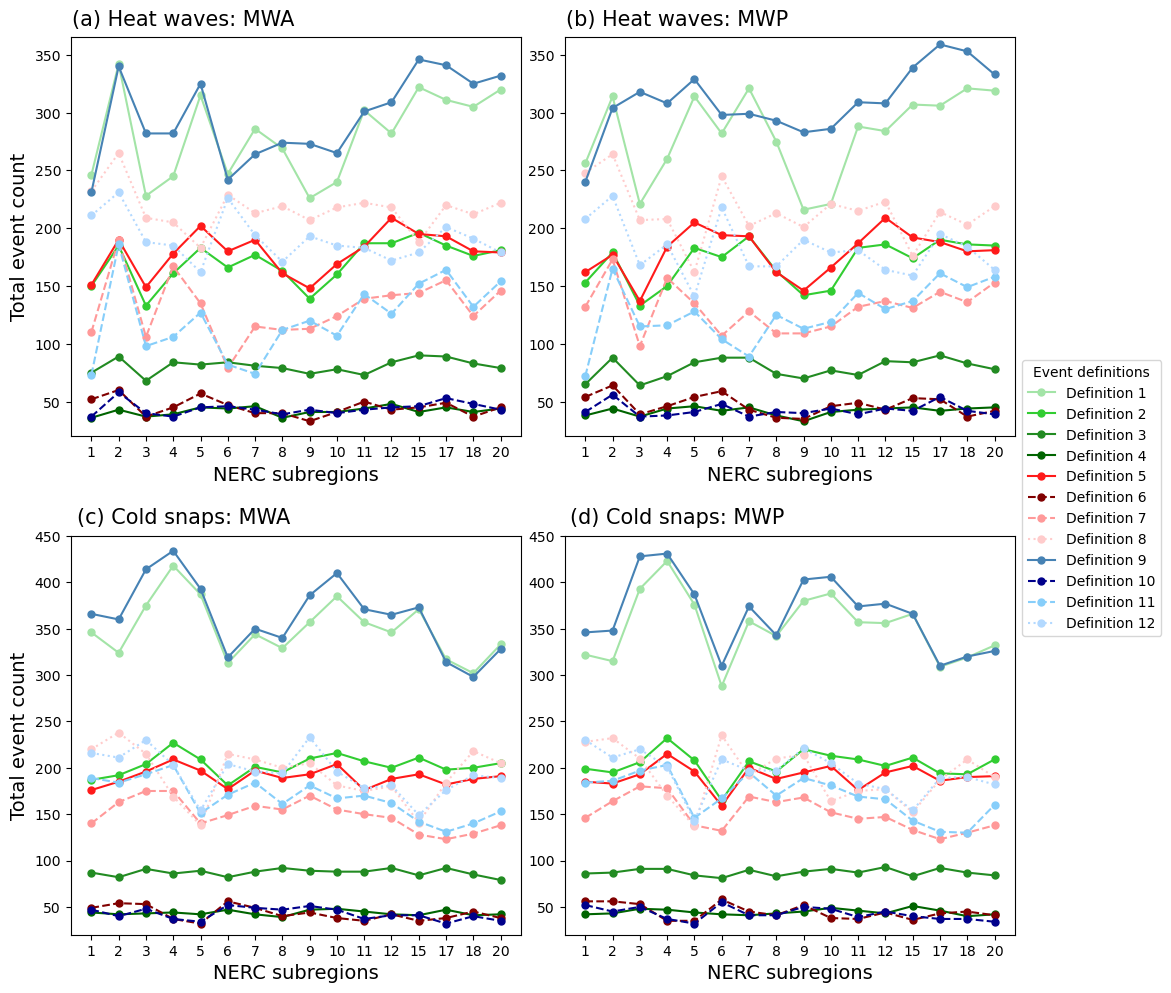

In [67]:
# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_area for heat waves
for idx, column in enumerate(grouped_hw_area_count.columns):
    axes[0, 0].plot(grouped_hw_area_count.index, grouped_hw_area_count[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 0].set_ylabel('Total event count', fontsize = 14)
axes[0, 0].set_ylim([20, 365])
axes[0, 0].set_xlabel('NERC subregions', fontsize = 14)
axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area_count.index])
axes[0, 0].text(0.25, 1.07, '(a) Heat waves: MWA', size=15, ha='center', va='top', transform=axes[0, 0].transAxes)

# Subplot 2: grouped_pop for heat waves
for idx, column in enumerate(grouped_hw_pop_count.columns):
    axes[0, 1].plot(grouped_hw_pop_count.index, grouped_hw_pop_count[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 1].set_ylim([20, 365])
axes[0, 1].set_xlabel('NERC subregions', fontsize = 14)
axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop_count.index])
axes[0, 1].text(0.25, 1.07, '(b) Heat waves: MWP', size=15, ha='center', va='top', transform=axes[0, 1].transAxes)

# Subplot 3: grouped_area for cold snaps
for idx, column in enumerate(grouped_cs_area_count.columns):
    axes[1, 0].plot(grouped_cs_area_count.index, grouped_cs_area_count[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 0].set_ylabel('Total event count',  fontsize = 14)
axes[1, 0].set_ylim([20, 450])
axes[1, 0].set_xlabel('NERC subregions', fontsize = 14)
axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area_count.index])
axes[1, 0].text(0.25, 1.07, '(c) Cold snaps: MWA', size=15, ha='center', va='top', transform=axes[1, 0].transAxes)

# Subplot 4: grouped_pop for cold snaps
for idx, column in enumerate(grouped_cs_pop_count.columns):
    axes[1, 1].plot(grouped_cs_pop_count.index, grouped_cs_pop_count[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 1].set_ylim([20, 450])
axes[1, 1].set_xlabel('NERC subregions', fontsize = 14)
axes[1, 1].set_xticklabels([extract_number(x) for x in grouped_cs_pop_count.index])
axes[1, 1].text(0.25, 1.07, '(d) Cold snaps: MWP', size=15, ha='center', va='top', transform=axes[1, 1].transAxes)

# Use the handles and labels from one subplot for the legend
handles, labels = axes[0, 0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure 3.tif", format = "tif", dpi = 300)
# Show the plot
plt.show()

# Plot for duration (event days)

In [70]:
# Group by the definition and NERC subregions, then calculate the mean of event duration
grouped_hw_area_day = all_hw_area.groupby(['definition', all_hw_area['NERC_ID']])['duration'].mean().unstack(0)
grouped_hw_pop_day = all_hw_pop.groupby(['definition', all_hw_pop['NERC_ID']])['duration'].mean().unstack(0)

grouped_cs_area_day = all_cs_area.groupby(['definition', all_cs_area['NERC_ID']])['duration'].mean().unstack(0)
grouped_cs_pop_day = all_cs_pop.groupby(['definition', all_cs_pop['NERC_ID']])['duration'].mean().unstack(0)


In [72]:
# Sort columns and rows
grouped_hw_area_day = grouped_hw_area_day.reindex(sorted(grouped_hw_area_day.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_area_day = grouped_hw_area_day.reindex(sorted(grouped_hw_area_day.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_hw_pop_day = grouped_hw_pop_day.reindex(sorted(grouped_hw_pop_day.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_pop_day = grouped_hw_pop_day.reindex(sorted(grouped_hw_pop_day.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_area_day = grouped_cs_area_day.reindex(sorted(grouped_cs_area_day.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_area_day = grouped_cs_area_day.reindex(sorted(grouped_cs_area_day.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_cs_pop_day = grouped_cs_pop_day.reindex(sorted(grouped_cs_pop_day.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_pop_day = grouped_cs_pop_day.reindex(sorted(grouped_cs_pop_day.index, key=lambda x: int(re.search(r'\d+', x).group())))


C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\1357704611.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area_day.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\1357704611.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop_day.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\1357704611.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area_day.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\1357704611.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.

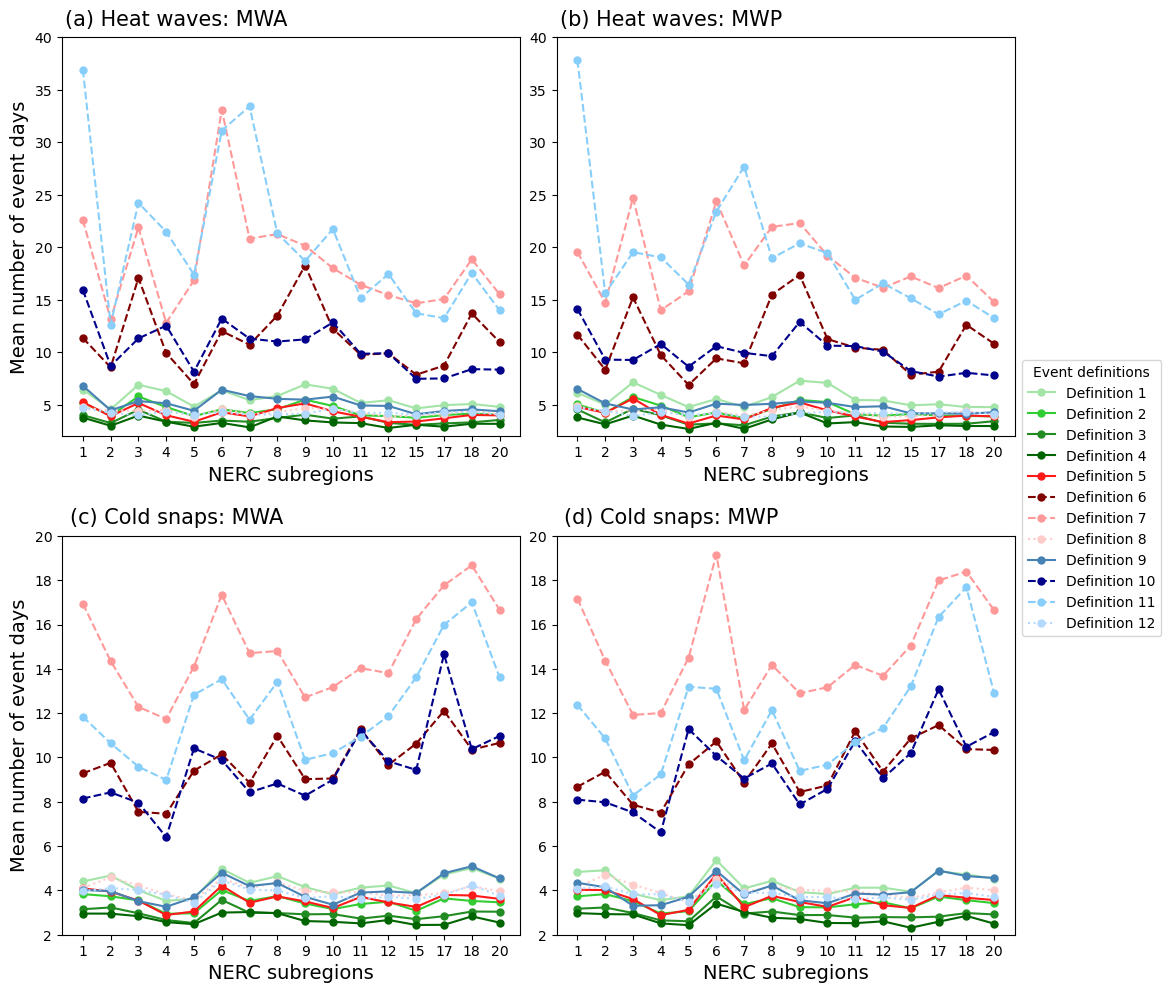

In [74]:
# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_area for heat waves
for idx, column in enumerate(grouped_hw_area_day.columns):
    axes[0, 0].plot(grouped_hw_area_day.index, grouped_hw_area_day[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 0].set_ylabel('Mean number of event days', fontsize = 14)
axes[0, 0].set_ylim([2, 40])
axes[0, 0].set_xlabel('NERC subregions', fontsize = 14)
axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area_day.index])
axes[0, 0].text(0.25, 1.07, '(a) Heat waves: MWA', size=15, ha='center', va='top', transform=axes[0, 0].transAxes)

# Subplot 2: grouped_pop for heat waves
for idx, column in enumerate(grouped_hw_pop_day.columns):
    axes[0, 1].plot(grouped_hw_pop_day.index, grouped_hw_pop_day[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 1].set_ylim([2, 40])
axes[0, 1].set_xlabel('NERC subregions', fontsize = 14)
axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop_day.index])
axes[0, 1].text(0.25, 1.07, '(b) Heat waves: MWP', size=15, ha='center', va='top', transform=axes[0, 1].transAxes)

# Subplot 3: grouped_area for cold snaps
for idx, column in enumerate(grouped_cs_area_day.columns):
    axes[1, 0].plot(grouped_cs_area_day.index, grouped_cs_area_day[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 0].set_ylabel('Mean number of event days',  fontsize = 14)
axes[1, 0].set_ylim([2, 20])
axes[1, 0].set_xlabel('NERC subregions', fontsize = 14)
axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area_day.index])
axes[1, 0].text(0.25, 1.07, '(c) Cold snaps: MWA', size=15, ha='center', va='top', transform=axes[1, 0].transAxes)

# Subplot 4: grouped_pop for cold snaps
for idx, column in enumerate(grouped_cs_pop_day.columns):
    axes[1, 1].plot(grouped_cs_pop_day.index, grouped_cs_pop_day[column], marker='o', 
                    label=column, color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 1].set_ylim([2, 20])
axes[1, 1].set_xlabel('NERC subregions', fontsize = 14)
axes[1, 1].set_xticklabels([extract_number(x) for x in grouped_cs_pop_day.index])
axes[1, 1].text(0.25, 1.07, '(d) Cold snaps: MWP', size=15, ha='center', va='top', transform=axes[1, 1].transAxes)

# Use the handles and labels from one subplot for the legend
handles, labels = axes[0, 0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace = 0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure 4.tif", format = "tif", dpi = 300)
# Show the plot
plt.show()

# Plot for spatial coverage percentage

In [76]:
# Group by the definition and NERC subregions, then calculate the mean of spatial coverage
grouped_hw_area_spa = all_hw_area.groupby(['definition', all_hw_area['NERC_ID']])['spatial_coverage'].mean().unstack(0)
grouped_hw_pop_spa = all_hw_pop.groupby(['definition', all_hw_pop['NERC_ID']])['spatial_coverage'].mean().unstack(0)

grouped_cs_area_spa = all_cs_area.groupby(['definition', all_cs_area['NERC_ID']])['spatial_coverage'].mean().unstack(0)
grouped_cs_pop_spa = all_cs_pop.groupby(['definition', all_cs_pop['NERC_ID']])['spatial_coverage'].mean().unstack(0)

In [78]:
# Sort columns and rows
grouped_hw_area_spa = grouped_hw_area_spa.reindex(sorted(grouped_hw_area_spa.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_area_spa = grouped_hw_area_spa.reindex(sorted(grouped_hw_area_spa.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_hw_pop_spa = grouped_hw_pop_spa.reindex(sorted(grouped_hw_pop_spa.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_hw_pop_spa = grouped_hw_pop_spa.reindex(sorted(grouped_hw_pop_spa.index, key=lambda x: int(re.search(r'\d+', x).group())))

grouped_cs_area_spa = grouped_cs_area_spa.reindex(sorted(grouped_cs_area_spa.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_area_spa = grouped_cs_area_spa.reindex(sorted(grouped_cs_area_spa.index, key=lambda x: int(re.search(r'\d+', x).group())))
grouped_cs_pop_spa = grouped_cs_pop_spa.reindex(sorted(grouped_cs_pop_spa.columns, key=lambda x: int(re.search(r'\d+', x).group())), axis=1)
grouped_cs_pop_spa = grouped_cs_pop_spa.reindex(sorted(grouped_cs_pop_spa.index, key=lambda x: int(re.search(r'\d+', x).group())))


C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\2182448294.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area_spa.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\2182448294.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop_spa.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\2182448294.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area_spa.index])
C:\Users\wanh535\AppData\Local\Temp\ipykernel_30488\2182448294.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.

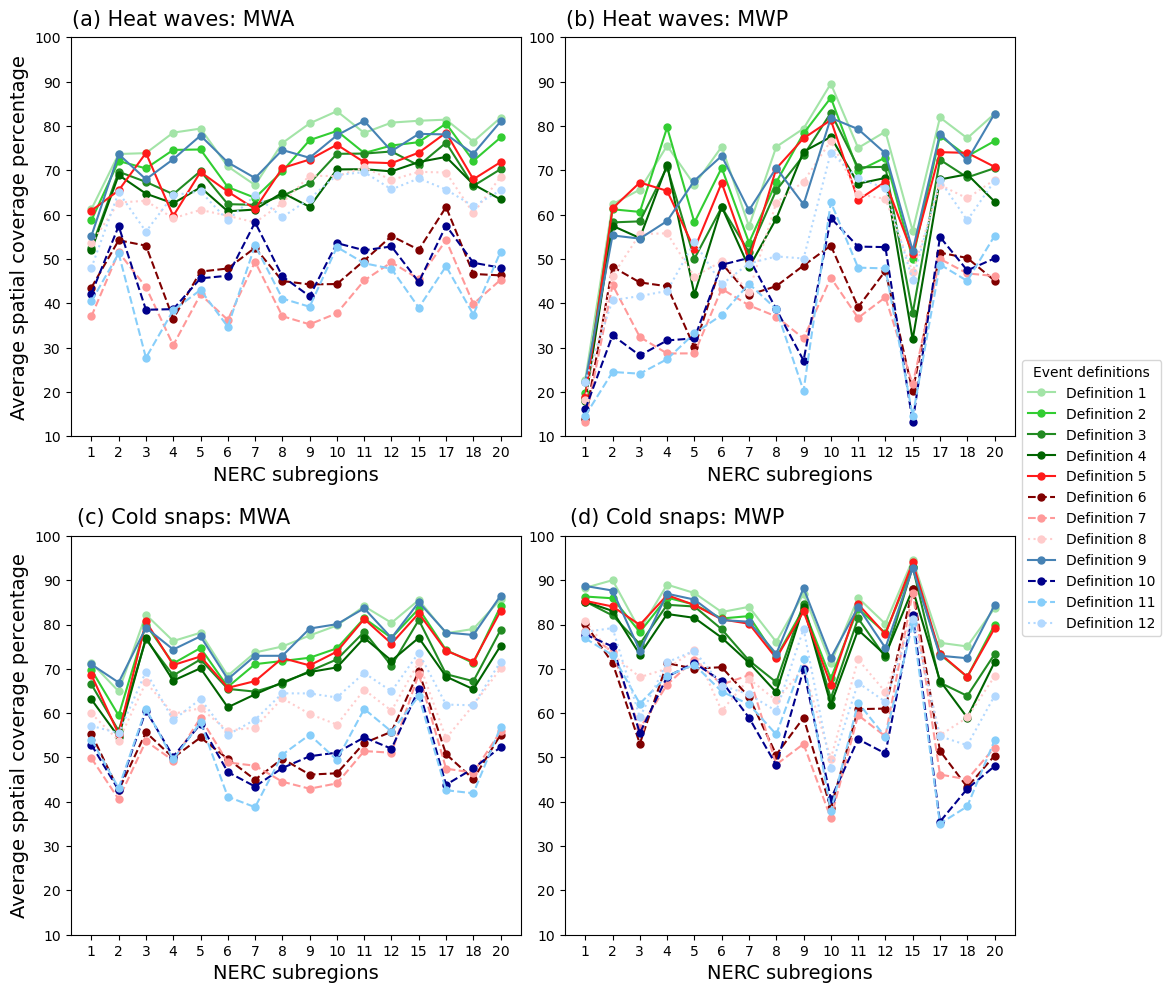

In [80]:
# Define the function to extract numbers
def extract_number(s):
    return re.findall(r'\d+', s)[0]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Define the marker size you want (e.g., 5)
marker_size = 5

# Subplot 1: grouped_area for heat waves
for idx, column in enumerate(grouped_hw_area_spa.columns):
    axes[0, 0].plot(grouped_hw_area_spa.index, grouped_hw_area_spa[column], marker='o', label=column, 
                    color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 0].set_ylabel('Average spatial coverage percentage', fontsize = 14)
axes[0, 0].set_ylim([10, 100])
axes[0, 0].set_xlabel('NERC subregions', fontsize = 14)
axes[0, 0].set_xticklabels([extract_number(x) for x in grouped_hw_area_spa.index])
axes[0, 0].text(0.25, 1.07, '(a) Heat waves: MWA', size=15, ha='center', va='top', transform=axes[0, 0].transAxes)

# Subplot 2: grouped_pop for heat waves
for idx, column in enumerate(grouped_hw_pop_spa.columns):
    axes[0, 1].plot(grouped_hw_pop_spa.index, grouped_hw_pop_spa[column], marker='o', label=column, 
                    color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[0, 1].set_ylim([10, 100])
axes[0, 1].set_xlabel('NERC subregions', fontsize = 14)
axes[0, 1].set_xticklabels([extract_number(x) for x in grouped_hw_pop_spa.index])
axes[0, 1].text(0.25, 1.07, '(b) Heat waves: MWP', size=15, ha='center', va='top', transform=axes[0, 1].transAxes)

# Subplot 3: grouped_area for cold snaps
for idx, column in enumerate(grouped_cs_area_spa.columns):
    axes[1, 0].plot(grouped_cs_area_spa.index, grouped_cs_area_spa[column], marker='o', label=column, 
                    color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 0].set_ylabel('Average spatial coverage percentage',  fontsize = 14)
axes[1, 0].set_ylim([10, 100])
axes[1, 0].set_xlabel('NERC subregions', fontsize = 14)
axes[1, 0].set_xticklabels([extract_number(x) for x in grouped_cs_area_spa.index])
axes[1, 0].text(0.25, 1.07, '(c) Cold snaps: MWA', size=15, ha='center', va='top', transform=axes[1, 0].transAxes)

# Subplot 4: grouped_pop for cold snaps
for idx, column in enumerate(grouped_cs_pop_spa.columns):
    axes[1, 1].plot(grouped_cs_pop_spa.index, grouped_cs_pop_spa[column], marker='o', label=column, 
                    color=custom_colors[idx], linestyle=linestyles[idx], markersize=marker_size)
axes[1, 1].set_ylim([10, 100])
axes[1, 1].set_xlabel('NERC subregions', fontsize = 14)
axes[1, 1].set_xticklabels([extract_number(x) for x in grouped_cs_pop_spa.index])
axes[1, 1].text(0.25, 1.07, '(d) Cold snaps: MWP', size=15, ha='center', va='top', transform=axes[1, 1].transAxes)

# Use the handles and labels from one subplot for the legend
handles, labels = axes[0, 0].get_legend_handles_labels()

# Create one common legend for the figure with unique labels
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5), ncol=1, title='Event definitions')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.25)  # Adjust the right parameter to make space for the legend

# plt.savefig("Figure 5.tif", format = "tif", dpi = 300)
# Show the plot
plt.show()